# 2. Detecting facial expressions from images

*Written by Jin Hyun Cheong and Eshin Jolly*

In this tutorial we'll explore the `Detector` class in more depth, demonstrating how to detect faces, facial landmarks, action units, and emotions from images.


## 2.1 Detecting a single face from a single image

### Setting up the Detector

When using the `Detector` you can either specify specific models to use or just load the default models. Below we use RetinaFace, MobileNet, ResMaskNet, and a Random Forest model for emotion detection

In [2]:
from feat import Detector

face_model = "retinaface"
landmark_model = "mobilenet"
au_model = "rf"
emotion_model = "resmasknet"

detector = Detector(
    face_model=face_model,
    landmark_model=landmark_model,
    au_model=au_model,
    emotion_model=emotion_model,
)

detector

feat.detector.Detector(face_model=retinaface, landmark_model=mobilenet, au_model=rf, emotion_model=resmasknet, facepose_model=pnp)

Let's process a single image with a single face. Py-feat includes a demo image for this purpose called `single_face.jpg` so lets use that. You can also use the convenient `imshow` function which will automatically load an image into a numpy array if provided a path unlike matplotlib:

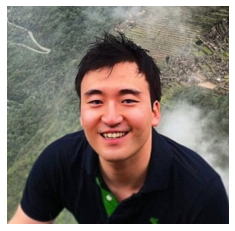

In [30]:
from feat.tests.utils import get_test_data_path
from feat.plotting import imshow
import os

# Helper to point to the test data folder
test_data_dir = get_test_data_path()

# Get the full path
single_face_img_path = os.path.join(test_data_dir, "single_face.jpg")

# Plot it
imshow(single_face_img_path)

Now we use our initialized `detector` instance to make predictions with the `detect_image()` method. This is the main workhorse method that will perform face, landmark, au, and emotion detection using the loaded models. It always returns a `Fex` data instance:

In [31]:
image_prediction = detector.detect_image(single_face_img_path)

# Show results
image_prediction

/Users/Esh/Documents/pypackages/py-feat/feat/detector.py:601: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_output = hog(


,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,Roll,Yaw,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0,186.0,139.0,206.0,268.0,0.989396,194.509063,192.77553,193.471052,197.312172,...,-3.809027,6.605721,0.001544,0.016613,0.000705,0.94996,0.000331,0.000407,0.03044,/Users/Esh/Documents/pypackages/py-feat/feat/t...


### Working with Fex data class results

Because the output is a `Fex` data class instance, we can utilize its various helper methods to inspect our predictions.

#### Visualizing detection results.

For example, we can easily plot the detection results.

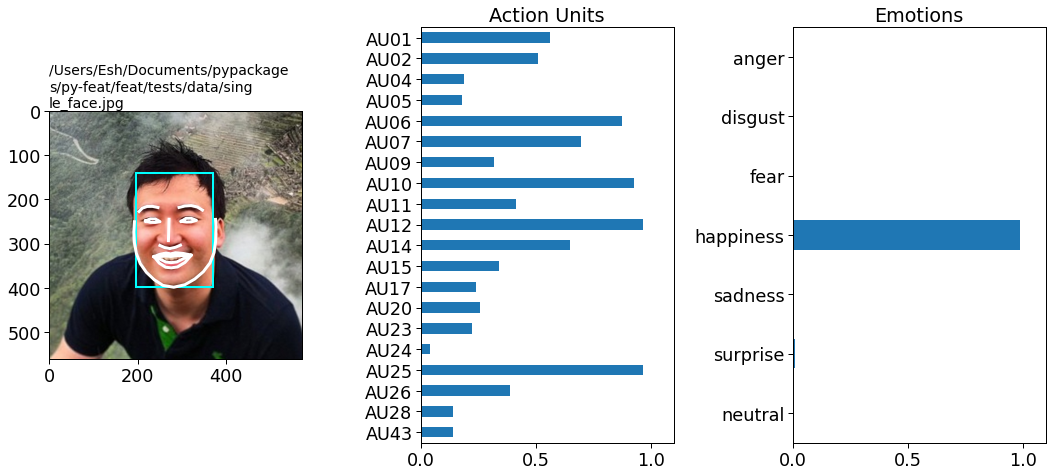

In [5]:
image_prediction.plot_detections();

To visualize the head pose, we can simply set `pose=True`. This setting will overlay the x,y, and z-axis of the head onto the image.

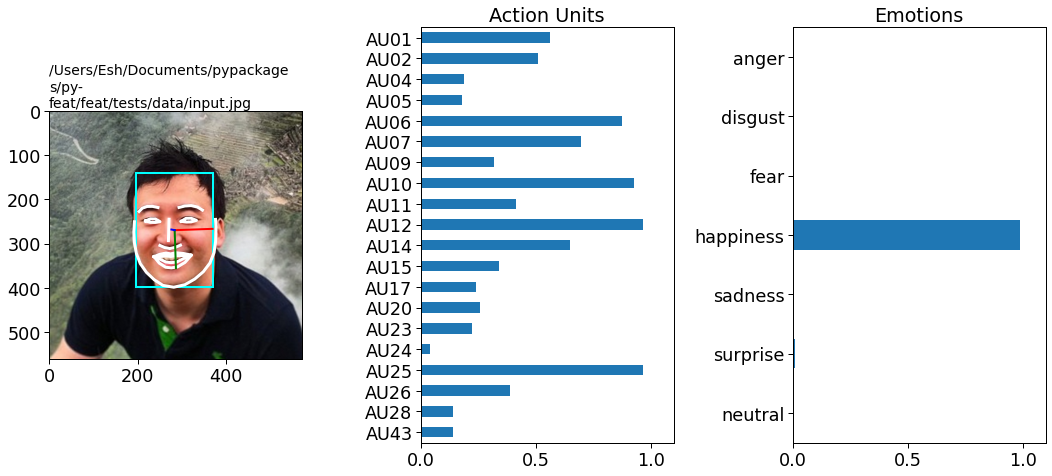

In [6]:
image_prediction.plot_detections(pose=True);

#### Easily accessing FEX columns of interest.  

We can also access the columns of interests (AUs, emotion) quickly. 

In [7]:
image_prediction.facebox()

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore
0,196.976837,140.997742,173.810486,257.639343,0.999681


In [8]:
image_prediction.aus()

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
0,0.56313,0.510732,0.18804,0.17787,0.874216,0.694585,0.319272,0.927146,0.4151,0.964379,0.646568,0.339296,0.2386,0.25925,0.224025,0.039379,0.966135,0.389137,0.142019,0.141042


In [9]:
image_prediction.emotions()

,anger,disgust,fear,happiness,sadness,surprise,neutral
0,0.000369,0.000026,0.000485,0.986996,0.000046,0.01201,0.000068


In [10]:
image_prediction.facepose() # (in degrees)

,Pitch,Roll,Yaw
0,0.968232,-1.903955,4.869262


#### Saving detection to a file

We can also save our detection directly to a file by specifying an `outputFname` when using `.detect_image`. The detector will return `True` when it's finished. 

In [17]:
detector.detect_image(test_image, outputFname = "output.csv")

/Users/Esh/Documents/pypackages/py-feat/feat/detector.py:601: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_output = hog(


True

#### Loading detection results from a saved file

We can load these is output using the `read_feat()` function, which behaves just like `pd.read_csv` from Pandas, but returns a `Fex` data class instead of a DataFrame. This gives you the full suite of Fex funcionality right away.

In [18]:
# prefer to pandas read_csv
from feat.utils import read_feat

input_prediction = read_feat("output.csv")

# Show results
input_prediction

,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,Roll,Yaw,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0,196.97684,140.99774,173.81049,257.63934,0.999681,192.864593,191.586715,192.874618,197.394792,...,-1.903955,4.869262,0.000369,0.000026,0.000485,0.986996,0.000046,0.01201,0.000068,/Users/Esh/Documents/pypackages/py-feat/feat/t...


## 2.2 Detecting multiple faces from a single image 

A `Detector` can automatically find multiple faces in a single image. We'll see that in the next example, the number of rows of the Fex data class returned from `.detect_image()` has one row for each detected face. We'll also try using a different model this time, Img2Pose, which acts as both a face detector and a face post estimator:

In [29]:
multi_face_image_path = os.path.join(test_data_dir, "multi_face.jpg")
multi_face_prediction = detector.detect_image(multi_face_image_path)

# Show results
multi_face_prediction

/Users/Esh/Documents/pypackages/py-feat/feat/detector.py:601: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_output = hog(


,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,Roll,Yaw,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0,307.0,230.0,107.0,126.0,0.994716,315.429241,316.183632,317.912844,321.205875,...,-2.973639,-4.679388,0.000101,0.002426,0.000216,0.914518,0.001248,0.001235,0.080256,/Users/Esh/Documents/pypackages/py-feat/feat/t...
1,0,529.0,303.0,110.0,132.0,0.994049,536.733614,534.36901,533.012362,533.194438,...,4.255018,8.171312,0.000269,0.006186,0.001372,0.973068,0.000859,0.000572,0.017675,/Users/Esh/Documents/pypackages/py-feat/feat/t...
2,0,676.0,283.0,120.0,140.0,0.993604,686.931936,685.053393,684.001538,684.407673,...,9.734623,6.029476,0.000677,0.005988,0.001107,0.952999,0.001957,0.005966,0.031307,/Users/Esh/Documents/pypackages/py-feat/feat/t...
3,0,215.0,45.0,102.0,125.0,0.990833,220.173309,218.134722,216.974433,217.157992,...,14.068047,-4.917797,0.001056,0.005686,0.000178,0.930691,0.000242,0.001178,0.060969,/Users/Esh/Documents/pypackages/py-feat/feat/t...
4,0,430.0,208.0,85.0,100.0,0.990231,439.764975,439.28178,439.591145,440.700337,...,1.971143,-4.030666,0.001312,0.01895,0.000629,0.665183,0.040487,0.000821,0.272619,/Users/Esh/Documents/pypackages/py-feat/feat/t...


Notice how `image_prediction` is now a Fex instance with 5 rows, one for each detected face. We can confirm this by plotting our detection results and poses like before:

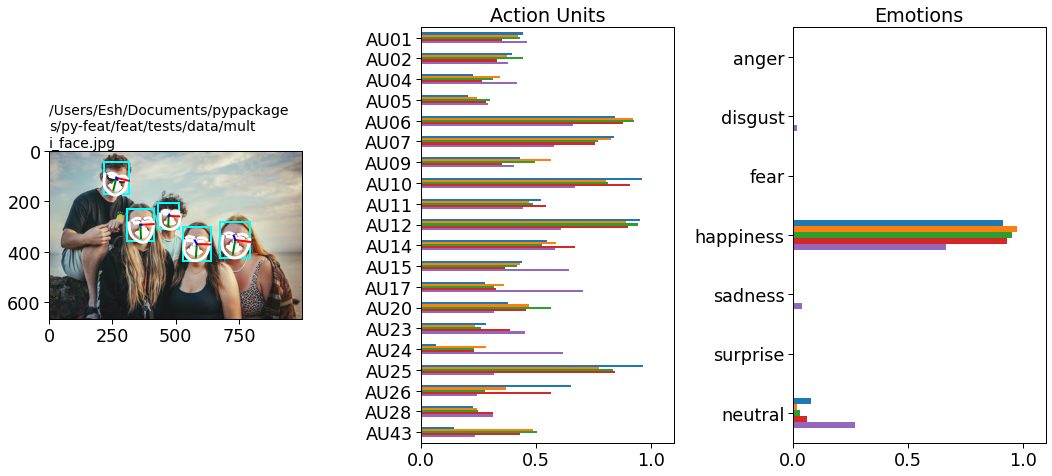

In [27]:
multi_face_prediction.plot_detections(pose=True);

## 2.3 Detecting faces from multiple images

`Detector` is also flexible enough to process multiple image files simultaneously if `.detect_image()` is passed a list of images. You can process multiple images in a *batch* to speed up processing, but **all images in a batch must have the same dimensions**.

In the example below we process both our single and multi-face example images from above, but force Py-Feat **not** to batch process them by setting `batch_size = 1`.

Notice how the returned Fex data class instance has 6 rows: 1 for the first face in the first image, and 5 for the faces in the second image:

In [32]:
img_list = [single_face_img_path, multi_face_image_path]

image_prediction = detector.detect_image(img_list, batch_size=1)
image_prediction

/Users/Esh/Documents/pypackages/py-feat/feat/detector.py:601: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_output = hog(
/Users/Esh/Documents/pypackages/py-feat/feat/detector.py:601: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_output = hog(


,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,Roll,Yaw,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0,186.0,139.0,206.0,268.0,0.989396,194.509063,192.77553,193.471052,197.312172,...,-3.809027,6.605721,0.001544,0.016613,0.000705,0.94996,0.000331,0.000407,0.03044,/Users/Esh/Documents/pypackages/py-feat/feat/t...
1,1,307.0,230.0,107.0,126.0,0.994716,315.429241,316.183632,317.912844,321.205875,...,-2.973639,-4.679388,0.000101,0.002426,0.000216,0.914518,0.001248,0.001235,0.080256,/Users/Esh/Documents/pypackages/py-feat/feat/t...
2,1,529.0,303.0,110.0,132.0,0.994049,536.733614,534.36901,533.012362,533.194438,...,4.255018,8.171312,0.000269,0.006186,0.001372,0.973068,0.000859,0.000572,0.017675,/Users/Esh/Documents/pypackages/py-feat/feat/t...
3,1,676.0,283.0,120.0,140.0,0.993604,686.931936,685.053393,684.001538,684.407673,...,9.734623,6.029476,0.000677,0.005988,0.001107,0.952999,0.001957,0.005966,0.031307,/Users/Esh/Documents/pypackages/py-feat/feat/t...
4,1,215.0,45.0,102.0,125.0,0.990833,220.173309,218.134722,216.974433,217.157992,...,14.068047,-4.917797,0.001056,0.005686,0.000178,0.930691,0.000242,0.001178,0.060969,/Users/Esh/Documents/pypackages/py-feat/feat/t...
5,1,430.0,208.0,85.0,100.0,0.990231,439.764975,439.28178,439.591145,440.700337,...,1.971143,-4.030666,0.001312,0.01895,0.000629,0.665183,0.040487,0.000821,0.272619,/Users/Esh/Documents/pypackages/py-feat/feat/t...


Calling `.plot_detections()` will now plot detections for all images the detector was passed:

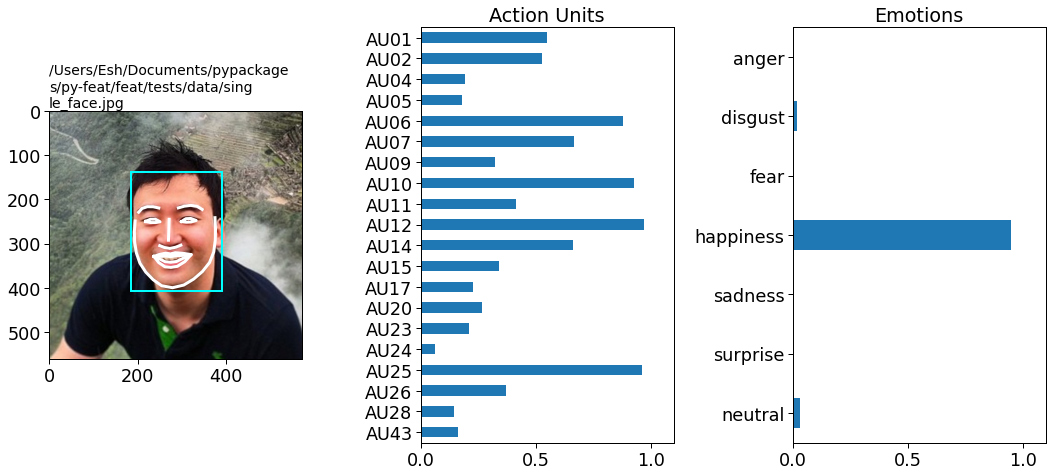

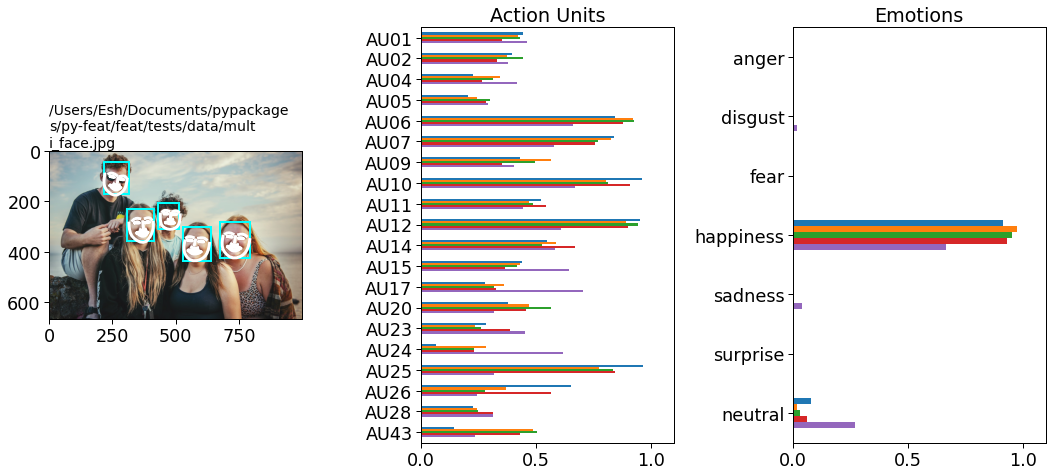

In [33]:
image_prediction.plot_detections();

However, it's easy to use pandas slicing sytax to just grab predictions for the image you want. We recommend using boolean indexing with `.loc` or `.query` rather than `.iloc` so that the results of your slice are a Fex dataframe rather than a Fex series:

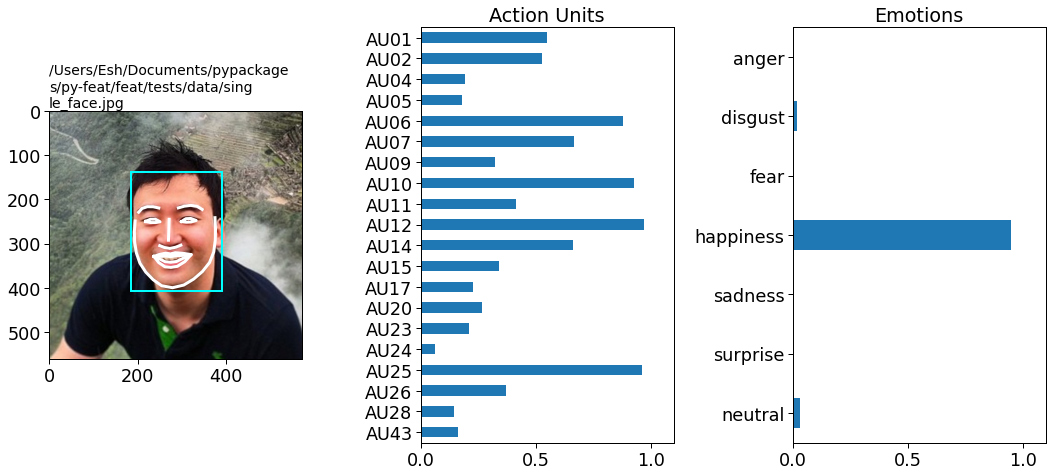

array([<AxesSubplot:title={'left':'/Users/Esh/Documents/pypackage\ns/py-feat/feat/tests/data/sing\nle_face.jpg'}>,
       <AxesSubplot:title={'center':'Action Units'}>,
       <AxesSubplot:title={'center':'Emotions'}>], dtype=object)

In [42]:
# Plot first frame which corresponds to img id
image_prediction.loc[image_prediction.frame == 0, :].plot_detections()

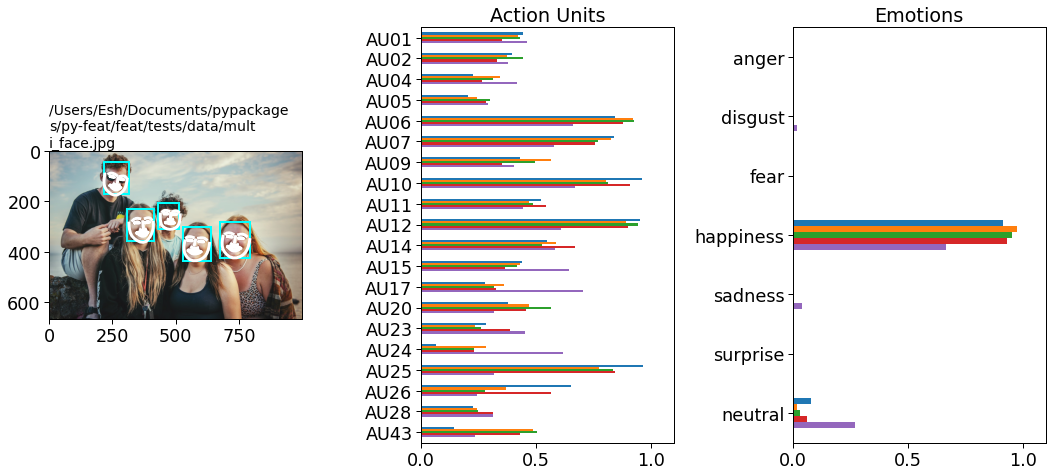

In [46]:
# Alternatively get the second image from the list of unique images by referencing the
# input column
image_to_plot = image_prediction['input'].unique()[1]
image_prediction.query("input == @image_to_plot").plot_detections();